In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
type(a)

numpy.ndarray

In [4]:
b  =a*2
b

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [5]:
x = np.linspace(-np.pi, np.pi, 100)
fx = 2*x +  np.sin(x)

In [6]:
x[:5]

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658])

In [7]:
fx[:5]

array([-6.28318531, -6.21967619, -6.15591169, -6.09163744, -6.02660115])

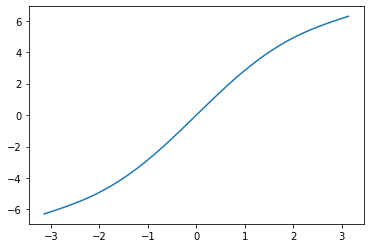

In [8]:
plt.plot(x, fx)
plt.show()

In [9]:
a.shape

(12,)

In [10]:
c = a.reshape(3,4)
c

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [11]:
c.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [12]:
c1 = np.random.randint(1, 10, 4).reshape(4,1)
c1

array([[3],
       [2],
       [3],
       [8]])

In [18]:
np.matmul(c,c1)

array([[ 50],
       [122],
       [194]])

In [13]:
i = np.eye(4)
i

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [14]:
i.mean()

0.25

In [15]:
c.mean()

6.5

In [23]:
c.mean(axis=1)

array([ 2.5,  6.5, 10.5])

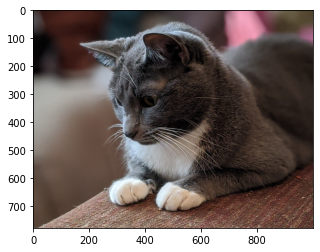

In [28]:
img = Image.open('cat.jpeg')
plt.imshow(img)
plt.show()

In [17]:
img.size

(400, 400)

In [29]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [30]:
img_np = np.array(img)
img_np.shape

(777, 1000, 3)

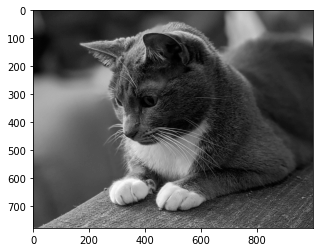

In [31]:
img_gray = img_np.mean(axis=2)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [32]:
img_gray.shape

(777, 1000)

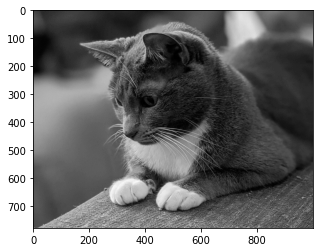

In [33]:
img_gray2 = img_np[:,:,0] * 0.7 + img_np[:,:,1] * 0.15 + img_np[:,:,2] * 0.15
plt.imshow(img_gray2, cmap='gray')
plt.show()

In [34]:
# egde detection by convolution operator
kernel = -1 * np.ones((3,3), dtype=np.int16)
kernel[1,1] = 8
kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]], dtype=int16)

In [35]:
img_edge = np.zeros(img_gray.shape)
# convolute
for i in range(1,img_gray.shape[0]-1):
    for j in range(1,img_gray.shape[1]-1):
        img_edge[i,j] = np.abs(np.sum(np.multiply(img_gray[i-1:i+2, j-1:j+2], kernel)))

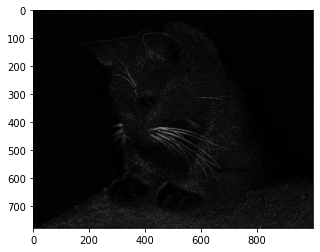

In [36]:
plt.imshow(img_edge, cmap='gray')
plt.show()

In [37]:
kernel2 = np.ones((3,3))/9
img_edge2 = np.zeros(img_np.shape)
# convolute
for k in range(img_np.shape[2]):
    for i in range(1,img_np.shape[0]-1):
        for j in range(1,img_np.shape[1]-1):
            img_edge2[i,j, k] = np.sum(np.multiply(img_np[i-1:i+2, j-1:j+2, k], kernel2))

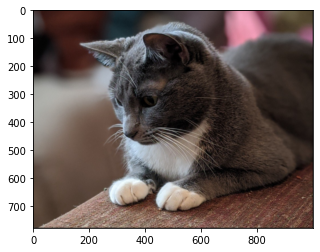

In [39]:
plt.imshow(img_edge2.astype(np.uint8))
plt.show()

In [40]:
i = 25
k=1
np.sum(np.multiply(img_np[i-1:i+2, j-1:j+2, k], kernel2))

69.55555555555556

In [41]:
img_edge2

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [69.88888889, 57.44444444, 57.44444444],
        [70.77777778, 57.88888889, 57.88888889],
        ...,
        [80.44444444, 68.77777778, 46.77777778],
        [80.22222222, 68.55555556, 46.55555556],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [70.44444444, 58.22222222, 58.22222222],
        [71.33333333, 58.88888889, 58.88888889],
        ...,
        [79.11111111, 67.77777778, 45.77777778],
        [78.88888889, 67.55555556, 45.55555556],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [82

In [52]:
kernel3 = np.array([[1, 4, 6, 4, 1], 
                [4, 16, 24, 16, 4],
                [6, 24, 36, 24, 6],
                [4, 16, 24, 16, 4],
                [1, 4, 6, 4, 1]])/256
img_edge3 = np.zeros(img_np.shape)
# convolute
for k in range(img_np.shape[2]):
    for i in range(2,img_np.shape[0]-2):
        for j in range(2,img_np.shape[1]-2):
            img_edge3[i,j,k] = np.sum(np.multiply(img_np[i-2:i+3, j-2:j+3, k], kernel3))

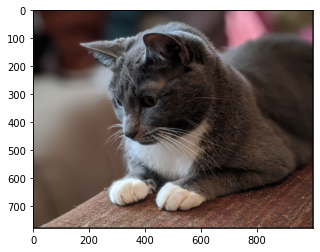

In [53]:
plt.imshow(img_edge3.astype(np.uint8))
plt.show()

In [5]:
matrix = np.random.randint(100, size=(4,4))
matrix

array([[87, 92, 22, 57],
       [32, 60, 37, 37],
       [25, 90, 99, 32],
       [93, 26, 13, 44]])

In [8]:
m = 80
sub_matrix = np.abs(matrix - m)
am = np.argmin(sub_matrix)
r, c = am//5, am%5
print("row: {} col: {}".format(r, c))

row: 0 col: 0


In [9]:
sub_matrix

array([[ 7, 12, 58, 23],
       [48, 20, 43, 43],
       [55, 10, 19, 48],
       [13, 54, 67, 36]])

In [13]:
ass = np.argsort(sub_matrix.reshape(-1))
ass

array([ 0,  9,  1, 12, 10,  5,  3, 15,  6,  7,  4, 11, 13,  8,  2, 14],
      dtype=int64)

In [14]:
ass[:5]

array([ 0,  9,  1, 12, 10], dtype=int64)